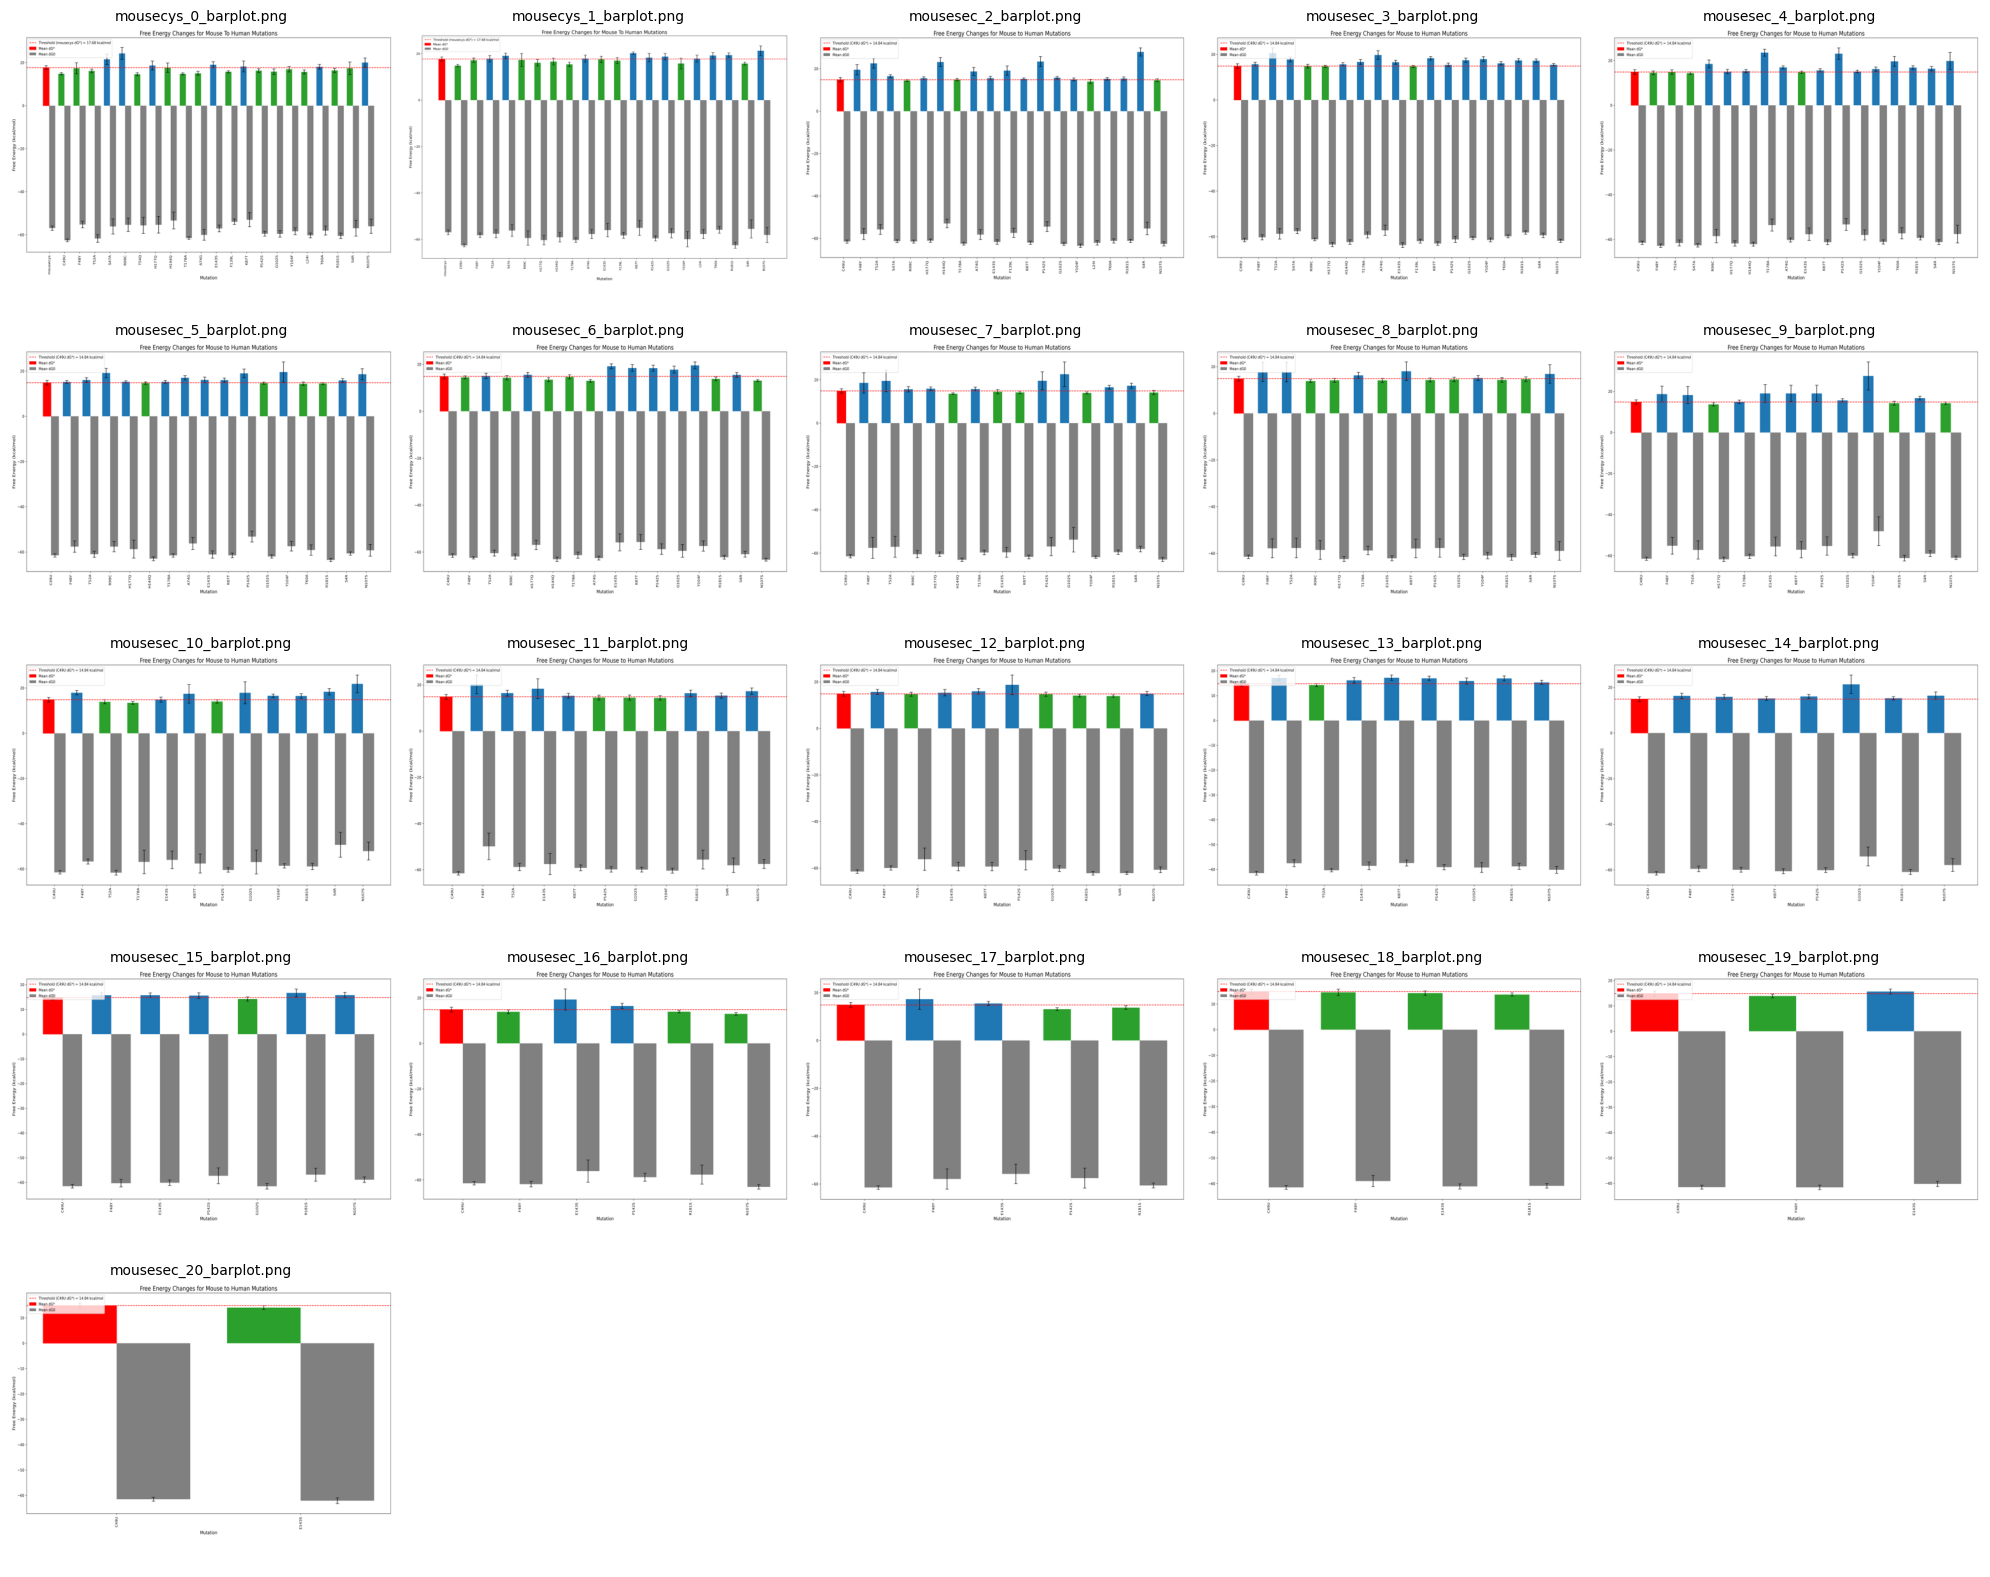

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Image filenames
image_files = [
    "mousecys_0_barplot.png",
    "mousecys_1_barplot.png",
] + [f"mousesec_{i}_barplot.png" for i in range(2, 21)]

fig, axs = plt.subplots(5, 5, figsize=(20, 16))  # Adjust grid size
axs = axs.flatten()

for i in range(len(axs)):
    if i < len(image_files):
        try:
            img = Image.open(image_files[i]).resize((600, 400))  # Resize to reduce load
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(os.path.basename(image_files[i]), fontsize=10)
        except Exception as e:
            axs[i].text(0.5, 0.5, 'Error loading image', ha='center', va='center')
            axs[i].axis('off')
    else:
        axs[i].axis('off')

plt.tight_layout()
plt.show()


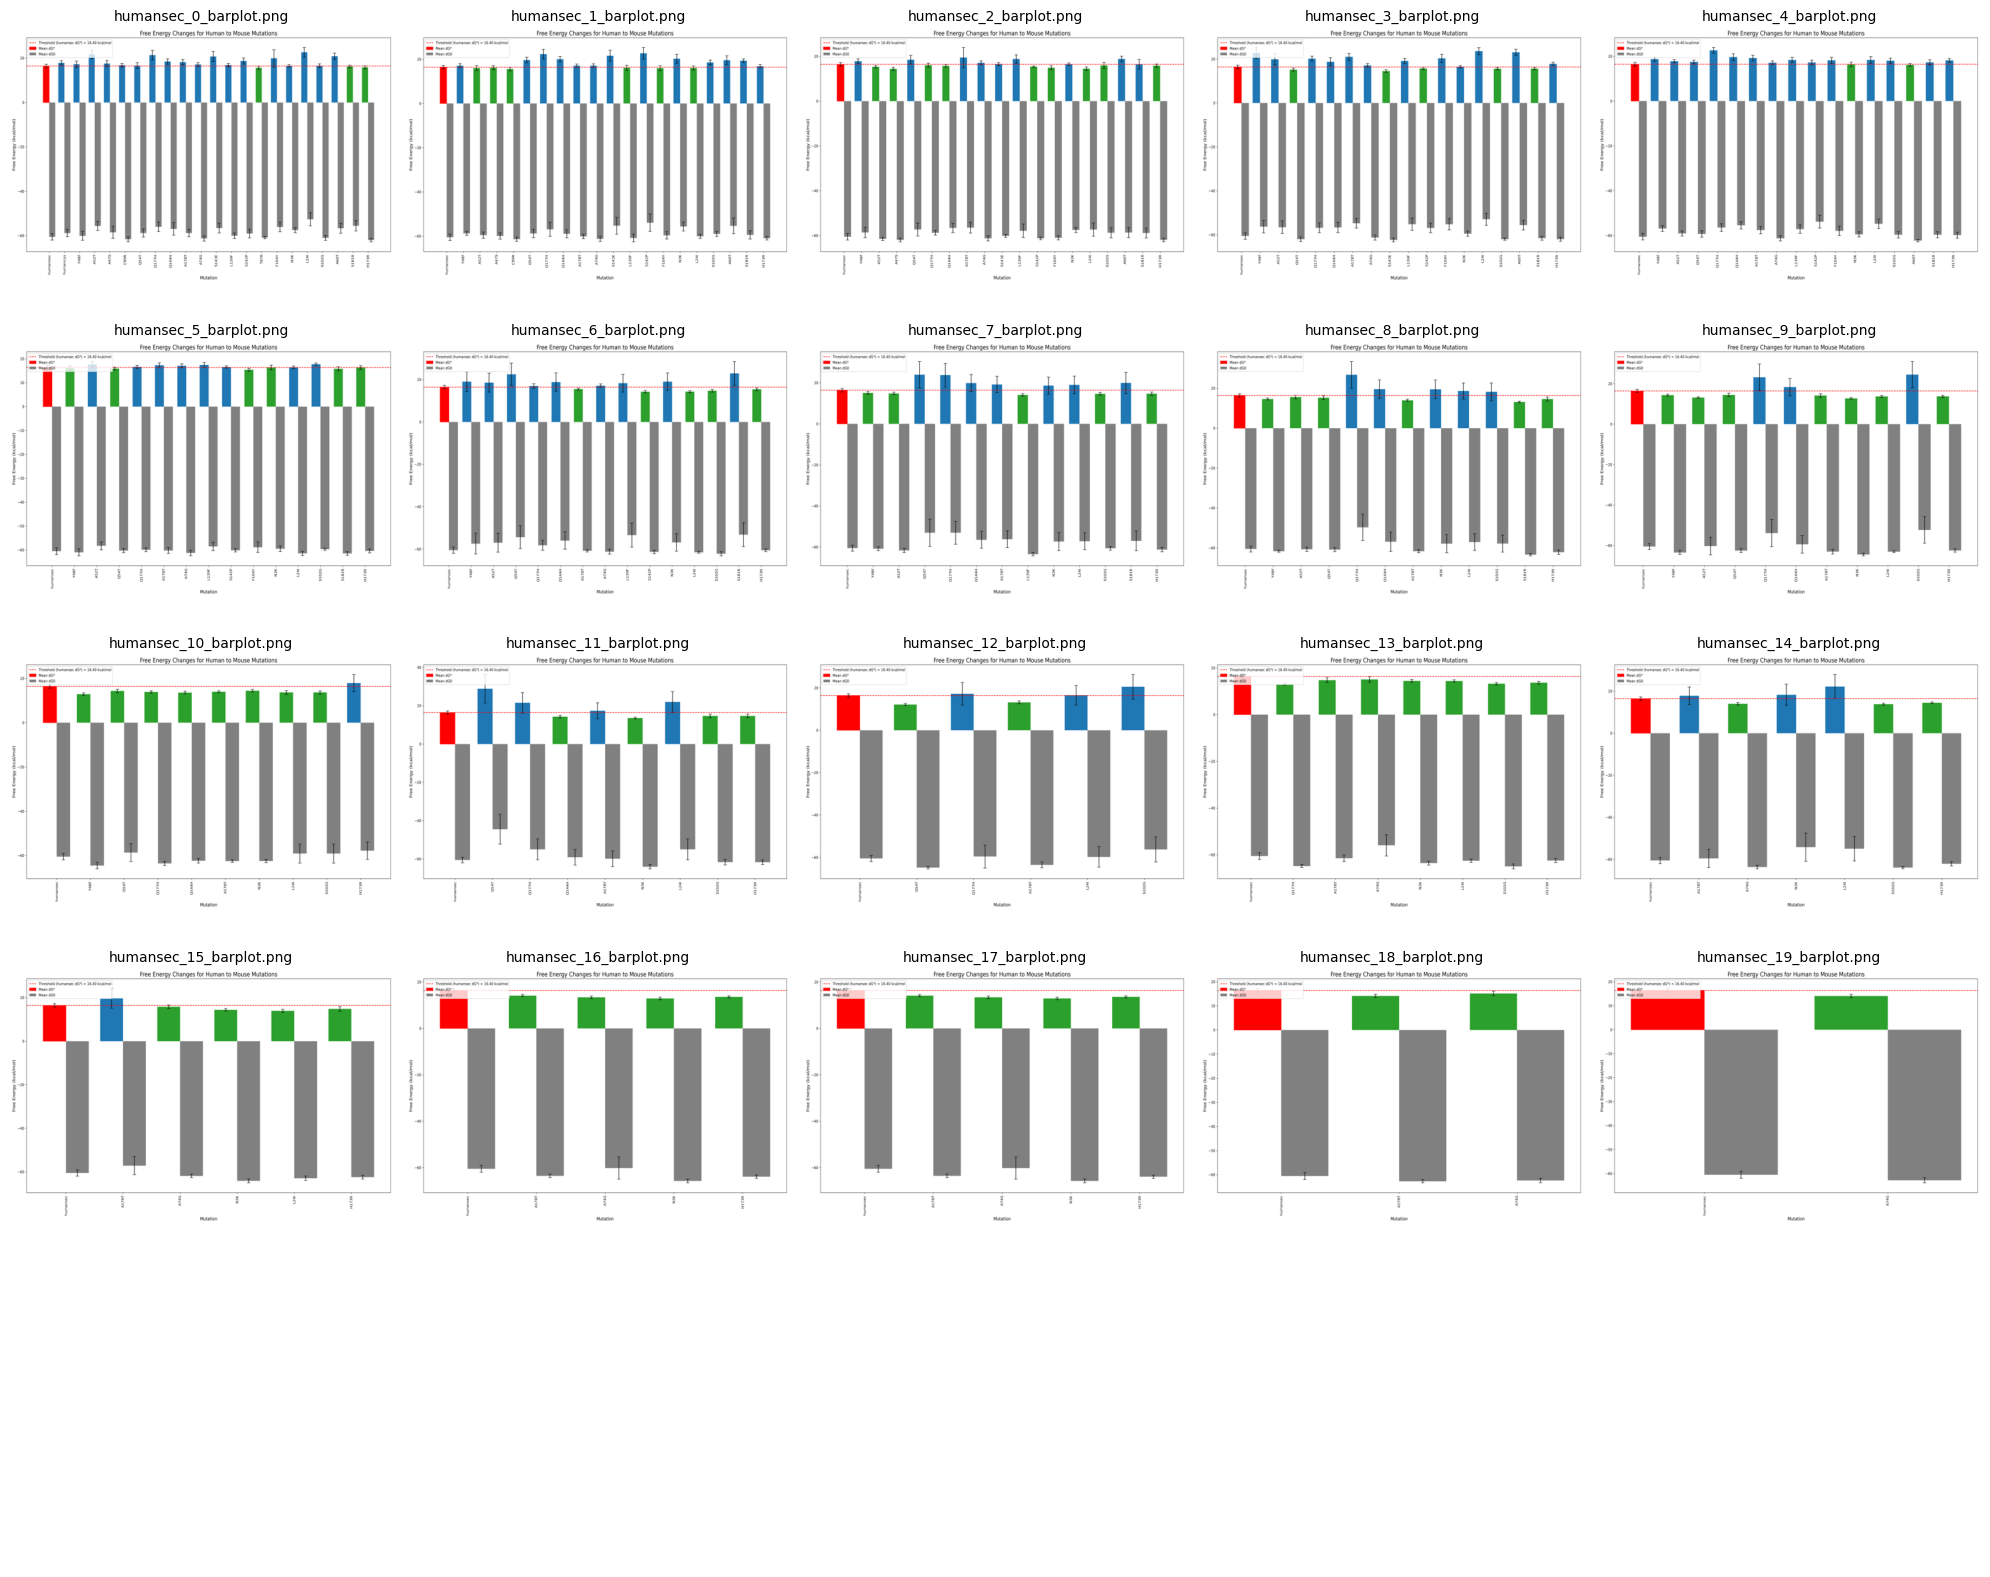

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Image filenames
image_files = [
] + [f"humansec_{i}_barplot.png" for i in range(0, 20)]

fig, axs = plt.subplots(5, 5, figsize=(20, 16))  # Adjust grid size
axs = axs.flatten()

for i in range(len(axs)):
    if i < len(image_files):
        try:
            img = Image.open(image_files[i]).resize((600, 400))  # Resize to reduce load
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(os.path.basename(image_files[i]), fontsize=10)
        except Exception as e:
            axs[i].text(0.5, 0.5, 'Error loading image', ha='center', va='center')
            axs[i].axis('off')
    else:
        axs[i].axis('off')

plt.tight_layout()
plt.show()


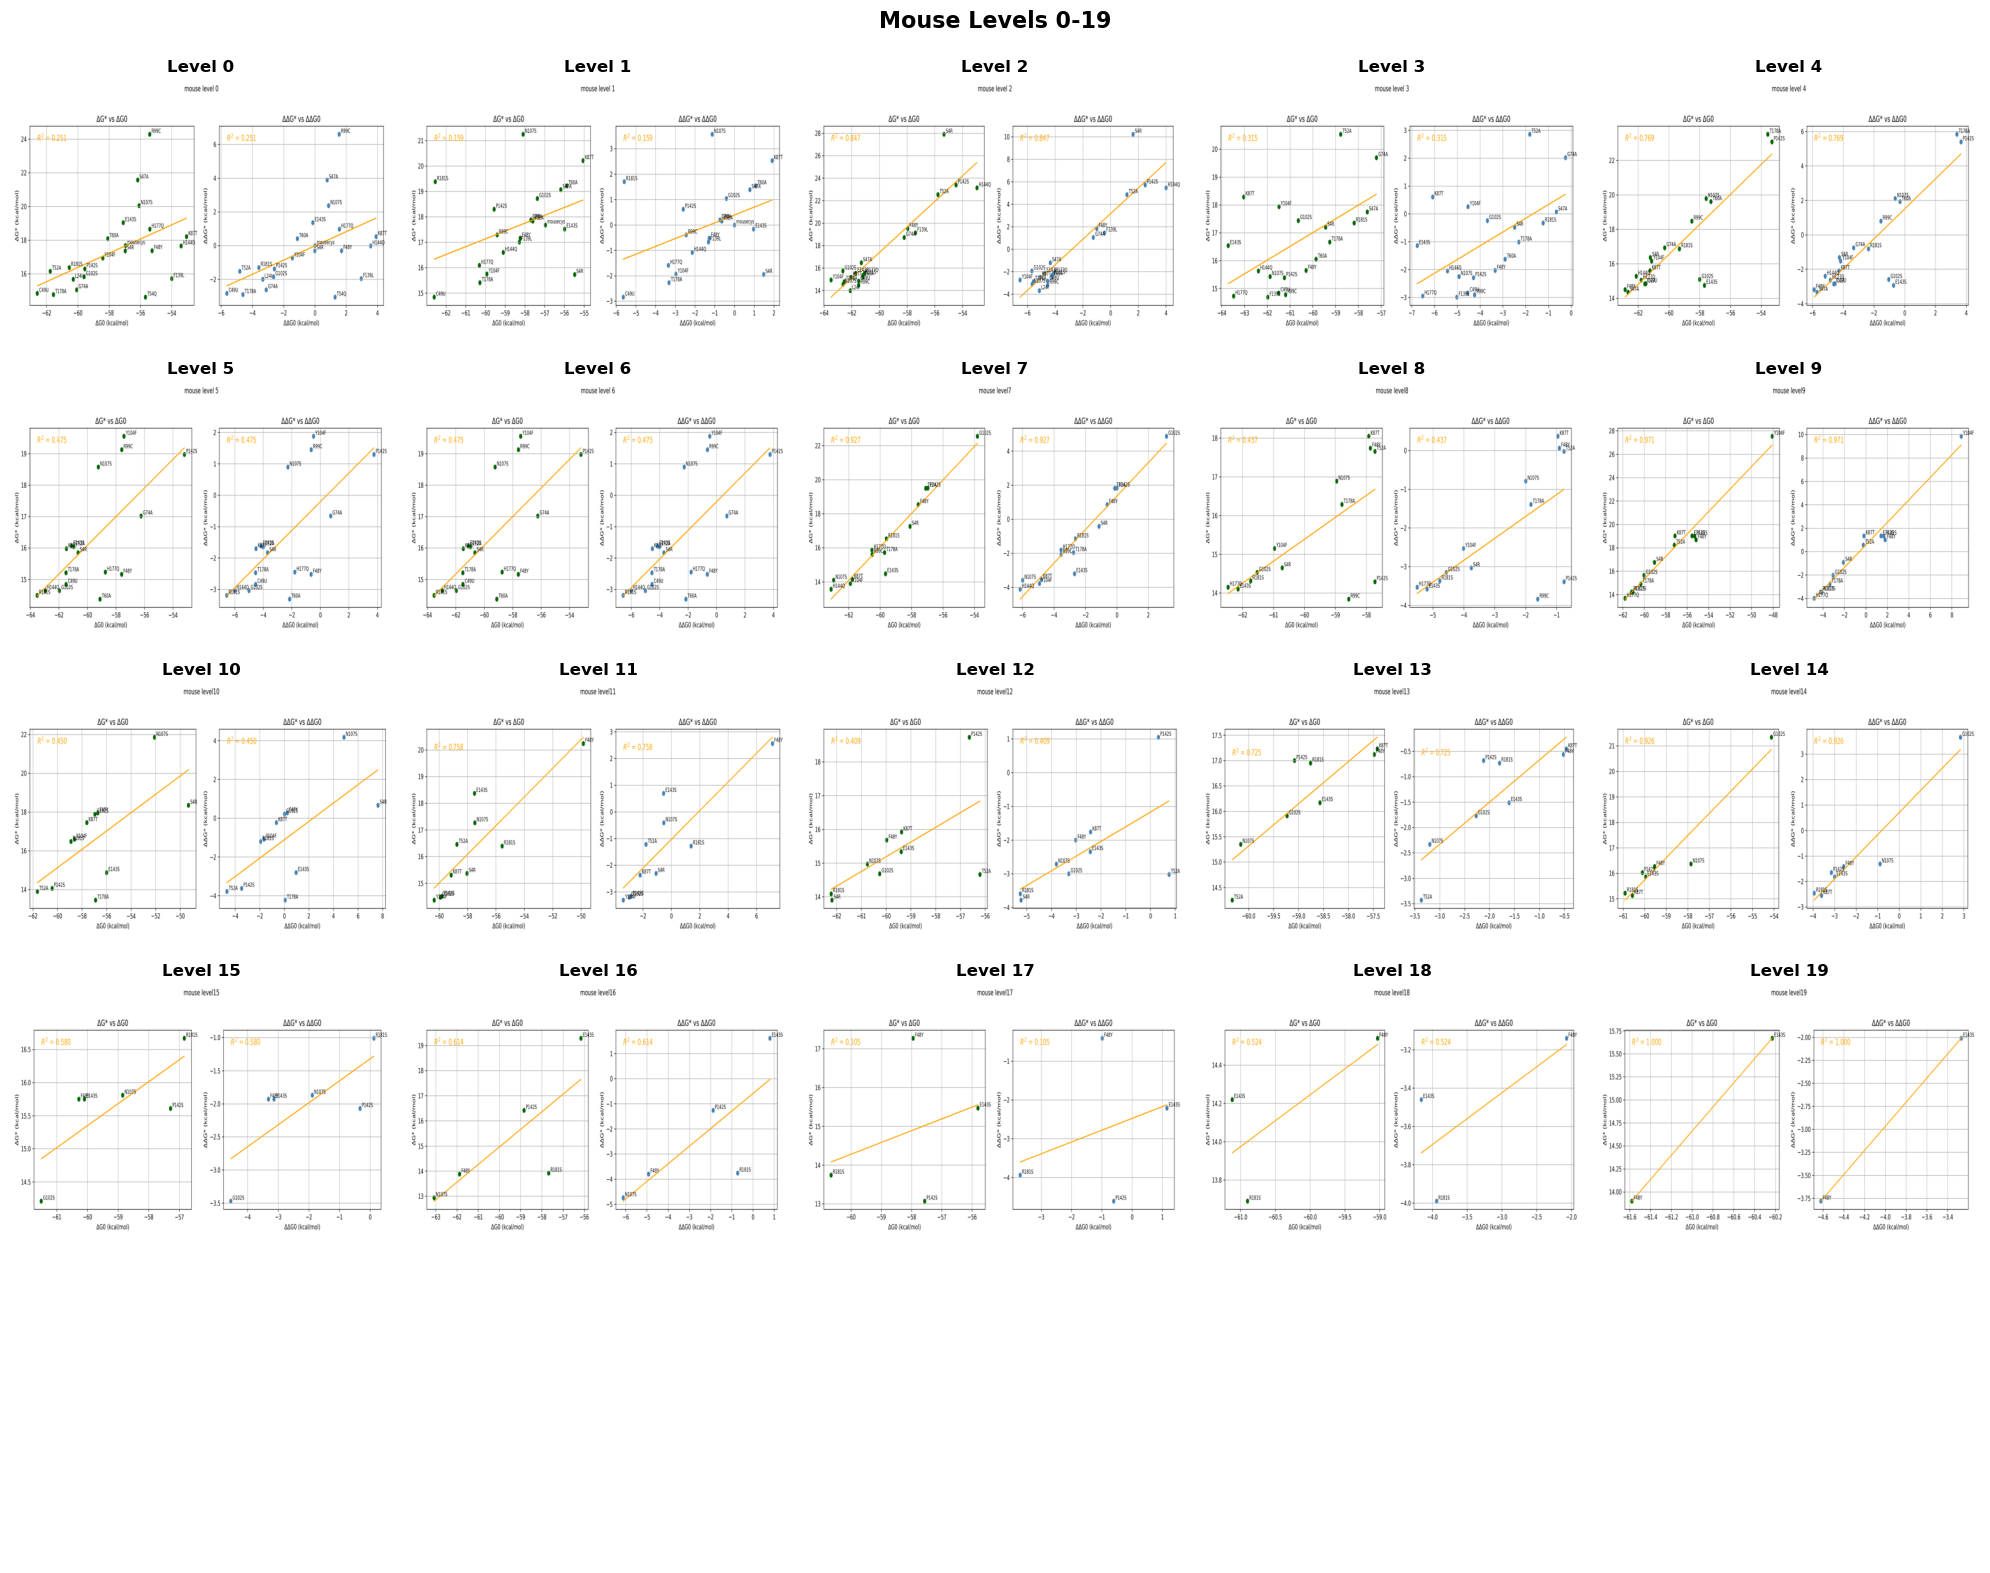

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Generate image filenames from level0mouse.png to level20mouse.png
image_files = [f"level{i}mouse.png" for i in range(20)]

# Create subplots - using 5x5 grid for 21 images (some cells will be empty)
fig, axs = plt.subplots(5, 5, figsize=(20, 16))
axs = axs.flatten()

for i in range(len(axs)):
    if i < len(image_files):
        try:
            # Check if file exists before trying to open
            if os.path.exists(image_files[i]):
                img = Image.open(image_files[i])
                # Resize image to reduce memory load and ensure consistent display
                img = img.resize((600, 400))
                axs[i].imshow(img)
                axs[i].axis('off')
                # Set title with level number
                axs[i].set_title(f"Level {i}", fontsize=12, fontweight='bold')
            else:
                # Handle missing files
                axs[i].text(0.5, 0.5, f'File not found:\n{image_files[i]}', 
                           ha='center', va='center', fontsize=10)
                axs[i].set_xlim(0, 1)
                axs[i].set_ylim(0, 1)
                axs[i].axis('off')
        except Exception as e:
            # Handle any other errors
            axs[i].text(0.5, 0.5, f'Error loading:\n{image_files[i]}\n{str(e)}', 
                       ha='center', va='center', fontsize=8)
            axs[i].set_xlim(0, 1)
            axs[i].set_ylim(0, 1)
            axs[i].axis('off')
    else:
        # Hide empty subplots
        axs[i].axis('off')

# Adjust layout and add main title
plt.suptitle('Mouse Levels 0-19', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Make room for main title
plt.show()

# Optional: Save the combined plot
# plt.savefig('mouse_levels_combined.png', dpi=300, bbox_inches='tight')